# Factors affecting Airbnb Prices

Dataset retreived from: https://www.kaggle.com/rusiano/madrid-airbnb-data#reviews_detailed.csv

In [1]:
import pandas as pd
import numpy as np

Only import the relevant fields

In [2]:
fields = ['id', 'house_rules', 'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 
          'beds', 'square_feet', 'price', 'minimum_nights', 'maximum_nights', 'neighbourhood',
          'review_scores_rating', 'cancellation_policy', 'license', 'instant_bookable']

In [3]:
df = pd.read_csv('listings_detailed.csv', usecols=fields)

### Basic data exploration

In [4]:
df.head(1)

,id,house_rules,neighbourhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,square_feet,price,minimum_nights,maximum_nights,review_scores_rating,license,instant_bookable,cancellation_policy
0,6369,NaN,Chamartín,40.45628,-3.67763,Apartment,Private room,1.0,1.0,0.0,172.0,$70.00,1,365,98.0,NaN,f,flexible


In [5]:
df.shape

(20837, 18)

In [6]:
df.describe()

,id,latitude,longitude,bathrooms,bedrooms,beds,square_feet,minimum_nights,maximum_nights,review_scores_rating
count,2.083700e+04,20837.000000,20837.000000,20827.000000,20828.000000,20786.000000,317.000000,20837.000000,2.083700e+04,15874.000000
mean,2.356026e+07,40.420548,-3.694500,1.302876,1.438880,1.981718,372.220820,4.373614,6.606360e+03,92.368779
std,1.083667e+07,0.021881,0.027793,0.762046,2.221507,1.665901,586.869162,20.428777,7.735639e+05,9.310702
min,6.369000e+03,40.319480,-3.890940,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,20.000000
25%,1.608985e+07,40.409550,-3.707490,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000e+01,90.000000
50%,2.459474e+07,40.418900,-3.701180,1.000000,1.000000,2.000000,86.000000,2.000000,1.125000e+03,95.000000
75%,3.401318e+07,40.429020,-3.689110,1.500000,2.000000,2.000000,603.000000,3.000000,1.125000e+03,98.000000
max,3.873002e+07,40.573990,-3.527660,17.000000,50.000000,59.000000,5167.000000,1125.000000,1.111111e+08,100.000000


## Data Cleaning

From the desciption we can see that MIN square_feet = 0, which needs to be converted to NA

In [7]:
df.loc[df.square_feet == 0, 'square_feet'] = np.nan

house_rules, license and instant_bookable should be converted to binary to reflect their prescence.

In [8]:
df.house_rules.fillna(value=0,inplace=True)
df.loc[df.house_rules != 0, 'house_rules'] = 1

df.license.fillna(value=0,inplace=True)
df.loc[df.license != 0, 'license'] = 1

df.instant_bookable = df.instant_bookable.replace(['t', 'f'],[1, 0])

In [9]:
df.cancellation_policy.unique()

array(['flexible', 'strict_14_with_grace_period', 'moderate',
       'super_strict_30', 'super_strict_60', 'strict'], dtype=object)

cancellation_policy has 6 possible options and can be left as it is

Removing currency from the price column

In [10]:
df.price = df.price.replace('[\$,]', '', regex=True).astype(float)

In [11]:
df.head(1)

,id,house_rules,neighbourhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,square_feet,price,minimum_nights,maximum_nights,review_scores_rating,license,instant_bookable,cancellation_policy
0,6369,0,Chamartín,40.45628,-3.67763,Apartment,Private room,1.0,1.0,0.0,172.0,70.0,1,365,98.0,0,0,flexible


### Dataframe to be used for modeling

In [12]:
model_df = pd.get_dummies(df, prefix="", prefix_sep="")

In [13]:
model_df.dropna(inplace=True)

In [14]:
model_df.head(1)

,id,house_rules,latitude,longitude,bathrooms,bedrooms,beds,square_feet,price,minimum_nights,...,Entire home/apt,Hotel room,Private room,Shared room,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60
0,6369,0,40.45628,-3.67763,1.0,1.0,0.0,172.0,70.0,1,...,0,0,1,0,1,0,0,0,0,0


Exploring the Y variable

In [15]:
df.boxplot(column =['price'])

Too many outliers to clear

### After cleaning

In [16]:
df.head(1)

,id,house_rules,neighbourhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,square_feet,price,minimum_nights,maximum_nights,review_scores_rating,license,instant_bookable,cancellation_policy
0,6369,0,Chamartín,40.45628,-3.67763,Apartment,Private room,1.0,1.0,0.0,172.0,70.0,1,365,98.0,0,0,flexible


In [17]:
df.describe()

,id,house_rules,latitude,longitude,bathrooms,bedrooms,beds,square_feet,price,minimum_nights,maximum_nights,review_scores_rating,license,instant_bookable
count,2.083700e+04,20837.000000,20837.000000,20837.000000,20827.000000,20828.000000,20786.000000,178.000000,20837.000000,20837.000000,2.083700e+04,15874.000000,20837.000000,20837.000000
mean,2.356026e+07,0.589576,40.420548,-3.694500,1.302876,1.438880,1.981718,662.887640,134.065364,4.373614,6.606360e+03,92.368779,0.174401,0.612228
std,1.083667e+07,0.491922,0.021881,0.027793,0.762046,2.221507,1.665901,648.937984,381.207575,20.428777,7.735639e+05,9.310702,0.379463,0.487254
min,6.369000e+03,0.000000,40.319480,-3.890940,0.000000,0.000000,0.000000,8.000000,8.000000,1.000000,1.000000e+00,20.000000,0.000000,0.000000
25%,1.608985e+07,0.000000,40.409550,-3.707490,1.000000,1.000000,1.000000,172.000000,40.000000,1.000000,4.000000e+01,90.000000,0.000000,0.000000
50%,2.459474e+07,1.000000,40.418900,-3.701180,1.000000,1.000000,2.000000,538.000000,65.000000,2.000000,1.125000e+03,95.000000,0.000000,1.000000
75%,3.401318e+07,1.000000,40.429020,-3.689110,1.500000,2.000000,2.000000,840.000000,100.000000,3.000000,1.125000e+03,98.000000,0.000000,1.000000
max,3.873002e+07,1.000000,40.573990,-3.527660,17.000000,50.000000,59.000000,5167.000000,9999.000000,1125.000000,1.111111e+08,100.000000,1.000000,1.000000


## Visualisation

In [18]:
from matplotlib import pyplot as plt

### Top 10 neighbourhoods with the highest price

In [19]:
df.groupby('neighbourhood').price.mean().sort_values(ascending=False).head(10)

neighbourhood
San Blas          387.969582
Hispanoamérica    218.265306
Cuatro Caminos    217.548673
Jerónimos         212.718750
Usera             191.491620
Valdeacederas     188.113636
Berruguete        172.875000
Bellas Vistas     168.464789
Castellana        166.644737
Hortaleza         164.340361
Name: price, dtype: float64

In [20]:
top_10_neigh_keys = list(df.groupby('neighbourhood').price.mean().sort_values(ascending=False).head(10).keys())
top_10_neigh_values = df.groupby('neighbourhood').price.mean().sort_values(ascending=False).head(10).values

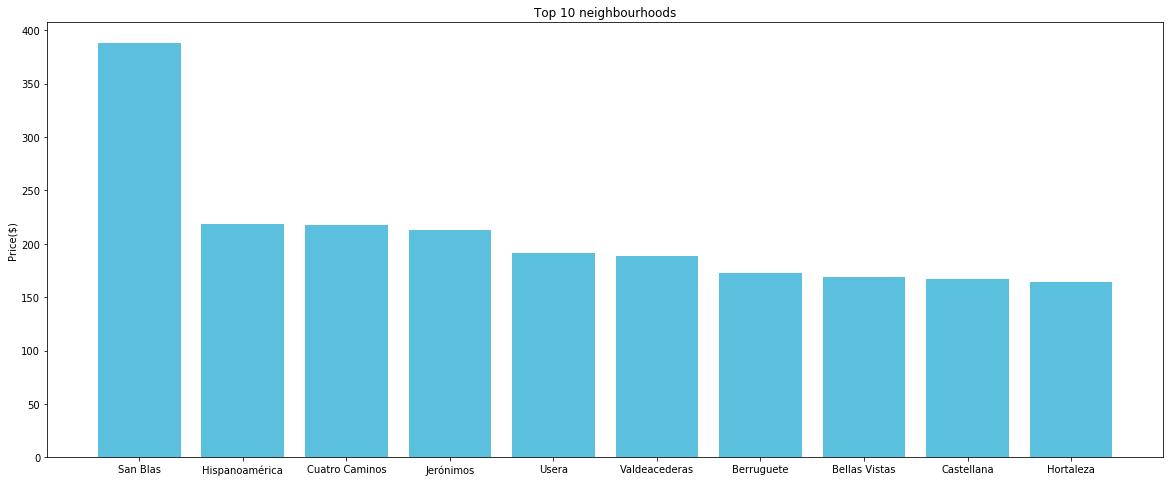

In [21]:
fig, ax = plt.subplots()
ax.bar(top_10_neigh_keys, top_10_neigh_values, color='#5bc0de')
fig.set_figheight(8)
fig.set_figwidth(20)

ax.set_ylabel("Price($)")
ax.title.set_text('Top 10 neighbourhoods')

plt.show()

San Bias is the neighbourhood with the most expensive rentals

### Top 10 Property type with the highest price

In [22]:
df.groupby('property_type').price.mean().sort_values(ascending=False).head(10)

property_type
Nature lodge             1262.000000
Farm stay                 909.000000
Hotel                     854.456522
Villa                     555.625000
Chalet                    549.314815
Pension (South Korea)     500.000000
Boutique hotel            481.638095
Igloo                     320.000000
Castle                    300.000000
Hostel                    272.168317
Name: price, dtype: float64

Number of properties on listing for the top 10 properties

In [23]:
for i in df.groupby('property_type').price.mean().sort_values(ascending=False).head(10).keys():
    print('Property type:', i , 'Number of properties:', df[df.property_type == i].property_type.count())

Property type: Nature lodge Number of properties: 1
Property type: Farm stay Number of properties: 1
Property type: Hotel Number of properties: 46
Property type: Villa Number of properties: 8
Property type: Chalet Number of properties: 54
Property type: Pension (South Korea) Number of properties: 2
Property type: Boutique hotel Number of properties: 105
Property type: Igloo Number of properties: 1
Property type: Castle Number of properties: 1
Property type: Hostel Number of properties: 202


In [24]:
top_10_prop_keys = list(df.groupby('property_type').price.mean().sort_values(ascending=False).head(10).keys())
top_10_prop_values = df.groupby('property_type').price.mean().sort_values(ascending=False).head(10).values

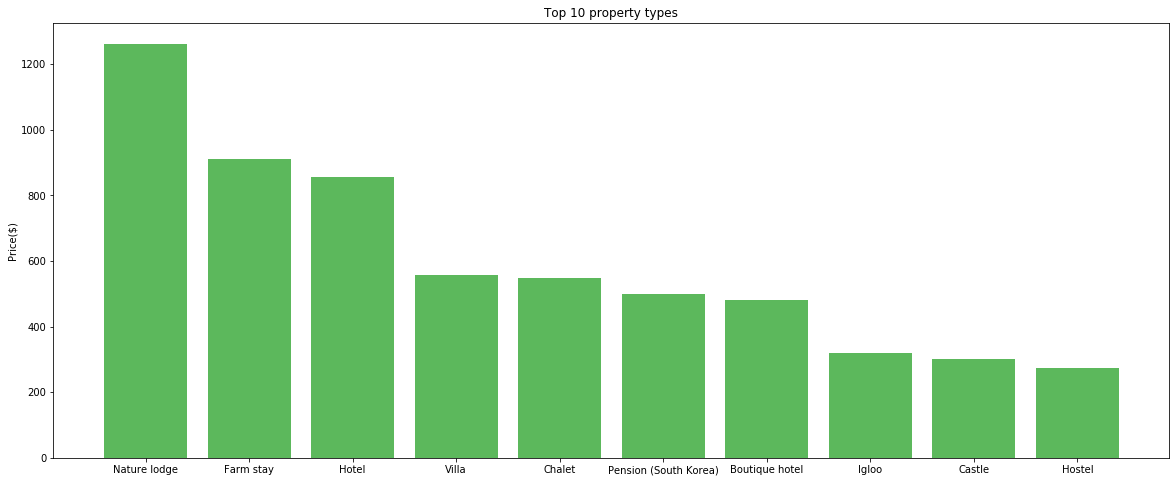

In [25]:
fig, ax = plt.subplots()
ax.bar(top_10_prop_keys, top_10_prop_values, color='#5cb85c')
fig.set_figheight(8)
fig.set_figwidth(20)

ax.set_ylabel('Price($)')
ax.title.set_text('Top 10 property types')

plt.show()

### How area (Square feet) affects price

In [26]:
import seaborn as sns

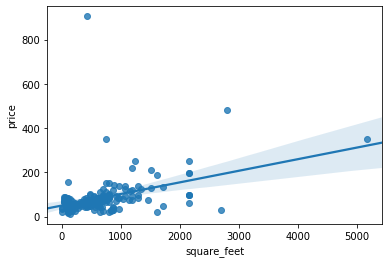

In [27]:
ax = sns.regplot(x ='square_feet', y ='price', data=df)

Positive relationship between area and price

## Modelling

We will be using multivariable regression model here

In [28]:
from sklearn import linear_model

### Part 1) Conduct multi-linear regression on all variables

In [29]:
regr = linear_model.LinearRegression()
x = model_df.drop(['id', 'longitude', 'latitude', 'price'], axis=1)
y = model_df.price
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
x.columns

Index(['house_rules', 'bathrooms', 'bedrooms', 'beds', 'square_feet',
       'minimum_nights', 'maximum_nights', 'review_scores_rating', 'license',
       'instant_bookable',
       ...
       'Entire home/apt', 'Hotel room', 'Private room', 'Shared room',
       'flexible', 'moderate', 'strict', 'strict_14_with_grace_period',
       'super_strict_30', 'super_strict_60'],
      dtype='object', length=116)

In [31]:
coef_df = pd.DataFrame({
    'x' : x.columns,
    'y' : regr.coef_
})

Factors which are has 0 coefficient will be removed

In [32]:
coef_df[coef_df.y == 0]

,x,y
56,Nueva España,0.0
60,Prosperidad,0.0
61,Puente de Vallecas,0.0
64,Rios Rosas,0.0
69,Trafalgar,0.0
70,Usera,0.0
71,Valdeacederas,0.0
72,Vallehermosa,0.0
73,Vicálvaro,0.0
74,Villa de Vallecas,0.0


In [33]:
coef_df_filtered = coef_df[coef_df.y != 0]

In [34]:
coef_df_filtered.reset_index(drop=True)

,x,y
0,house_rules,0.750881
1,bathrooms,17.848440
2,bedrooms,11.216161
3,beds,3.348678
4,square_feet,0.036127
...,...,...
77,Hotel room,-5.293366
78,Private room,-18.410213
79,flexible,12.321613
80,moderate,-1.756801


Top 10 factors affecting price according to multi-linear model

In [35]:
coef_df_filtered.reindex(coef_df_filtered.y.abs().sort_values(ascending=False).index).head(10)

,x,y
39,Fuente del Berro,-227.136907
92,Hostel,-187.526970
104,Townhouse,98.426966
79,Bed and breakfast,63.328836
52,Lista,48.436429
44,Hortaleza,-48.268622
66,San Blas,46.320031
59,Palos do Moguer,46.202102
62,Recoletos,45.239735
24,Castilla,-43.292221


### Part 2) Analysing the magnitude of neighbourhoods against price

In [36]:
model_df_2 = pd.get_dummies(df[['neighbourhood','price']], prefix="", prefix_sep="")

In [37]:
model_df_2.head()

,price,Acacias,Adelfas,Almagro,Almenara,Aluche,Arapiles,Arganzuela,Argüelles,Atocha,...,San Blas,Sol,Tetuán,Trafalgar,Usera,Valdeacederas,Vallehermosa,Vicálvaro,Villa de Vallecas,Villaverde
0,70.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,115.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
regr2 = linear_model.LinearRegression()
x2 = model_df_2.iloc[:,1:]
y2 = model_df_2.price
regr2.fit(x2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
coef_df2 = pd.DataFrame({
    'x' : x2.columns,
    'y' : regr2.coef_
})

Top 10 neighbourhoods which increases the price

In [40]:
top10 = coef_df2.reindex(coef_df2.y.sort_values(ascending=False).index).head(10)

In [41]:
top10

,x,y
56,San Blas,228.719582
33,Hispanoamérica,59.015306
22,Cuatro Caminos,58.298673
37,Jerónimos,53.468750
60,Usera,32.241620
61,Valdeacederas,28.863636
11,Berruguete,13.625000
10,Bellas Vistas,9.214789
13,Castellana,7.394737
34,Hortaleza,5.090361


Top 10 neighbourhoods which decreases the price

In [42]:
bottom10 = coef_df2.reindex(coef_df2.y.sort_values().index).head(10)

In [43]:
bottom10

,x,y
3,Almenara,-101.056452
14,Castilla,-97.119565
65,Villaverde,-94.082335
0,Acacias,-87.715753
27,Estrella,-84.014706
12,Carabanchel,-79.087243
40,La Latina,-75.767588
49,Palos do Moguer,-74.148734
39,La Chopera,-73.095070
51,Puente de Vallecas,-72.866162


## FourSquare API

The aim of FourSquare API is to find the nearby amenities of the housing and to explain why different neighbourhoods contribute differently to the prices

In [44]:
CLIENT_ID = 'AJMW1MCPSQMRCA3YLKUV2AOFTTUFAE00NP3JDOUD5EMHP3VJ'
CLIENT_SECRET = 'XIPPMIMLP0C0SEKHJRIZBTZWL03Z55LGIFCOTHTKFMOIFXOA'
VERSION = '20180604'
LIMIT = 30

Creating neighbourhood dataframe. the coordinates of neighbourhood will be the mean of the respective longitude and latitudes

In [45]:
import json
import requests

In [46]:
with open('neighbourhoods.geojson') as f:
    data = json.load(f)
n = []
lat = []
long = []
for i in data['features']:
    n.append(i['properties']['neighbourhood'])
    lo = 0
    la = 0
    counter = 0
    for ll in i['geometry']['coordinates'][0][0]:
        lo += ll[0]
        la += ll[1]
        counter += 1
    long.append(lo/counter)
    lat.append(la/counter)
coord_neigh = pd.DataFrame({
    'neighbourhood': n,
    'latitude': lat,
    'longitude': long
})

In [47]:
coord_neigh

,neighbourhood,latitude,longitude
0,Palacio,40.416523,-3.712356
1,Embajadores,40.409330,-3.701076
2,Cortes,40.415365,-3.697783
3,Justicia,40.423326,-3.698700
4,Universidad,40.425674,-3.706193
...,...,...,...
123,Alameda de Osuna,40.455470,-3.592877
124,Timón,40.488010,-3.599435
125,Aeropuerto,40.475426,-3.550831
126,Casco Histórico de Barajas,40.474347,-3.578972


In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [49]:
neigh_venues = getNearbyVenues(names=coord_neigh['neighbourhood'],
                                   latitudes=coord_neigh['latitude'],
                                   longitudes=coord_neigh['longitude']
                                  )

Palacio
Embajadores
Cortes
Justicia
Universidad
Sol
Imperial
Acacias
Chopera
Legazpi
Delicias
Palos de Moguer
Atocha
Pacífico
Adelfas
Estrella
Ibiza
Jerónimos
Niño Jesús
Recoletos
Goya
Fuente del Berro
Guindalera
Lista
Castellana
El Viso
Prosperidad
Pavones
Ciudad Jardín
Hispanoamérica
Nueva España
Castilla
Bellas Vistas
Cuatro Caminos
Castillejos
Vallehermoso
El Pardo
Almenara
Valdeacederas
Berruguete
Gaztambide
Arapiles
Trafalgar
Almagro
Rios Rosas
Fuentelareina
Peñagrande
Argüelles
Pilar
La Paz
Valdezarza
Valverde
Casa de Campo
Mirasierra
El Goloso
Horcajo
Ciudad Universitaria
Numancia
Valdemarín
El Plantío
Aravaca
Cármenes
Puerta del Angel
Lucero
Aluche
San Isidro
Campamento
Cuatro Vientos
Aguilas
Comillas
Opañel
Vista Alegre
Puerta Bonita
Buenavista
Abrantes
Orcasitas
Orcasur
San Fermín
Almendrales
Moscardó
Zofío
Pradolongo
Portazgo
Entrevías
San Diego
Palomeras Bajas
Palomeras Sureste
Marroquina
Media Legua
Fontarrón
Vinateros
Ventas
Pueblo Nuevo
Quintana
Concepción
San Pascual
S

In [50]:
neigh_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Palacio,40.416523,-3.712356,Plaza de Oriente,40.418326,-3.712196,Plaza
1,Palacio,40.416523,-3.712356,Santa Iglesia Catedral de Santa María la Real ...,40.415767,-3.714516,Church
2,Palacio,40.416523,-3.712356,Cervecería La Mayor,40.415218,-3.712194,Beer Bar
3,Palacio,40.416523,-3.712356,Plaza de la Villa,40.415409,-3.710391,Historic Site
4,Palacio,40.416523,-3.712356,Zuccaru,40.417179,-3.711674,Ice Cream Shop


In [51]:
neigh_venues.Neighborhood.nunique()

120

Out of 128 neighbourhoods given by Geojson file, only 120 neighbourhoods are registered by FourSquare API

In [52]:
# one hot encoding
n_onehot = pd.get_dummies(neigh_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
n_onehot['Neighborhood'] = neigh_venues['Neighborhood'] 

n_onehot.head()

,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Service,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Toy / Game Store,Trail,Train,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
n_group = n_onehot.groupby('Neighborhood').sum().reset_index()

In [54]:
n_group.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Service,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Toy / Game Store,Trail,Train,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Abrantes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acacias,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Adelfas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aguilas,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Alameda de Osuna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Surrounding amenities which differentiate the neighbourhoods

In this section we will be finding the differenc of surrounding amenties between the top 10 neighbourhoods which increases the apartment price and the top 10 neighbourhoods which decreases the apartment price.

This is done by taking a look at what are some of the amenties which the top 10 neighbourhoods have as compared to the top 10 neighbourhoods which decreases the apartment price are lacking.

### Surrounding amenities which increases price of rental

In [55]:
top10_df = n_group.loc[n_group['Neighborhood'].isin(top10.x)]
top10_df.insert(0, 'Type', 'top10')
top10_df = top10_df.groupby('Type').mean()
top10_df.insert(0, 'Type', 'top10')

bottom10_df = n_group.loc[n_group['Neighborhood'].isin(bottom10.x)]
bottom10_df.insert(0, 'Type', 'bottom10')
bottom10_df = bottom10_df.groupby('Type').mean()
bottom10_df.insert(0, 'Type', 'bottom10')

neigh_data = top10_df.append(bottom10_df, ignore_index=True)
neigh_data.set_index('Type', inplace=True)

neigh_data_t = neigh_data.transpose()
neigh_data_t['Differences'] = neigh_data_t.top10 - neigh_data_t.bottom10

In [56]:
neigh_data_t[neigh_data_t.Differences > 0].sort_values(['Differences'], ascending = False)

Type,top10,bottom10,Differences
Spanish Restaurant,3.428571,1.00,2.428571
Restaurant,1.571429,0.50,1.071429
Japanese Restaurant,0.714286,0.00,0.714286
Seafood Restaurant,0.714286,0.00,0.714286
Gastropub,0.714286,0.00,0.714286
...,...,...,...
Mediterranean Restaurant,0.285714,0.25,0.035714
Sushi Restaurant,0.285714,0.25,0.035714
Pub,0.285714,0.25,0.035714
Gym,0.285714,0.25,0.035714


The top factor affecting the price will be due to the prescence of restaurant. More specifically, spanish restaurant which can be expected due as we are analysing Madrid dataset.

### Surrounding amenities which decreases price of rental

In [57]:
neigh_data_t[neigh_data_t.Differences < 0].sort_values(['Differences'])

Type,top10,bottom10,Differences
Gym / Fitness Center,0.428571,1.00,-0.571429
Asian Restaurant,0.000000,0.50,-0.500000
Indie Theater,0.000000,0.50,-0.500000
Bar,0.857143,1.25,-0.392857
Big Box Store,0.000000,0.25,-0.250000
Sporting Goods Shop,0.000000,0.25,-0.250000
Skate Park,0.000000,0.25,-0.250000
Playground,0.000000,0.25,-0.250000
Pharmacy,0.000000,0.25,-0.250000
Peruvian Restaurant,0.000000,0.25,-0.250000


The factors presented may not be as significant since the differences are not that huge